In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.dpi']= 300

In [14]:
logistic_map = lambda x, a: a * x * (1 - x)

a_params = np.linspace(2.5, 4, 5000)

xval, yval = [], []
for a in a_params:
    
    x = np.random.rand()
    
    for i in range(700):
        x = logistic_map(x, a)
        
        if i > 600:
            xval.append(a)
            yval.append(x)

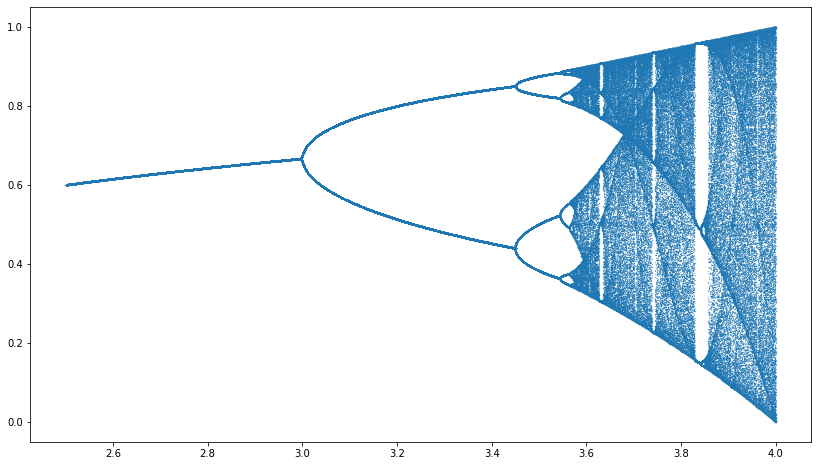

In [15]:
plt.figure(figsize=(14, 8))
plt.scatter(xval, yval, s=0.05)
plt.show()

In [87]:
henon_map = lambda x, y, a, b: np.array([a - x*x + b * y, x*x])

b = -0.3
a_params = np.linspace(1, 2.2, 1)

xval, yval = [], []
for a in a_params:
    
    x, y = np.random.rand(2)
    x, y = 0.0, 0.0
    
    for i in range(200):
        x, y = henon_map(x, y, a, b)
        print(x, y)
        
        if i > 100:
            xval.append(a)
            yval.append(x)

1.0 0.0
0.0 1.0
0.7 0.0
0.51 0.48999999999999994
0.5929 0.2601
0.57043959 0.35153040999999996
0.5691395511606319 0.3254013258393681
0.578459773552864 0.3239198286953255
0.5682083417725716 0.33461570961883075
0.5767545674544152 0.32286071965993557
0.5704959530224897 0.3326458310795296
0.5747406182611025 0.32546563241503873
0.572033531996334 0.3303267782791543
0.5736796047880529 0.32722236172820085
0.5727250025317633 0.32910828894977656
0.5732535847900587 0.32801392852500827
0.5729761489678444 0.32861967247465307
0.5731124309715826 0.32830166728602145
0.5730516412800365 0.32845785853415704
0.5730744588660093 0.3283881835737436
0.5730692095233075 0.3284143354045694
0.5730673804749605 0.32840831890366856
0.5730712817644662 0.3284062225644332
0.5730674392475019 0.3284106939831682
0.5730705018793603 0.3284062899256893
0.5730683128980313 0.32840980012426185
0.5730697687149255 0.3284072912477959
0.5730688528106831 0.32840895981497825
0.5730694019937542 0.32840791006175235
0.5730690874799952 0.

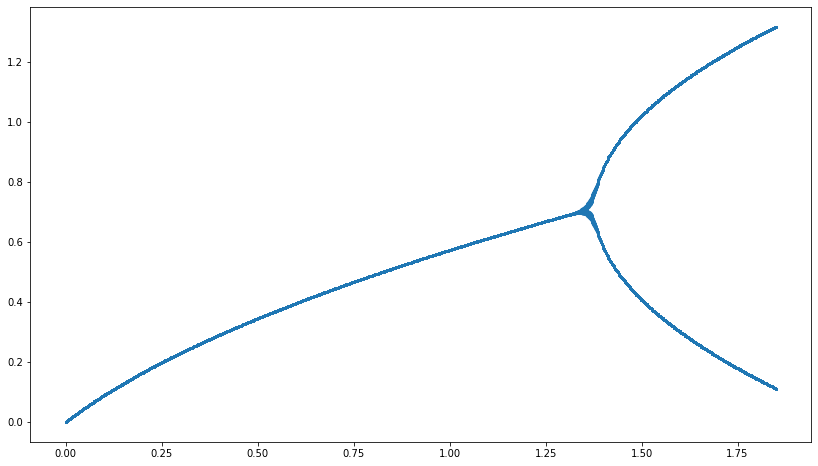

In [85]:
plt.figure(figsize=(14, 8))
plt.scatter(xval, yval, s=1)
plt.show()

In [2]:
## two agents system

from dataclasses import dataclass
@dataclass
class Agent:
    a: np.float64
    b: np.float64
    c: np.float64

def step(agent0, agent1, tau=1, p=0):
    diffC = agent0.c - agent1.c
    deltaC0 = (1-agent0.a) * -diffC + agent0.a * (agent0.b - agent0.c) * abs(diffC)
    deltaC1 = (1-agent1.a) * diffC + agent1.a * (agent1.b - agent1.c) * abs(diffC)
    agent0.c += tau * deltaC0 + p
    agent1.c += tau * deltaC1 + p

    
agent0 = Agent(.9, 0.0, 0.2)
agent1 = Agent(.9, 1.0, 0.7)

step(agent0, agent1, 1.0)
print(agent0)
print(agent1)

nsteps = 100
for i in range(nsteps):
    step(agent0, agent1, 1.0)
    
print(agent0)
print(agent1)

Agent(a=0.9, b=0.0, c=0.16)
Agent(a=0.9, b=1.0, c=0.7849999999999999)
Agent(a=0.9, b=0.0, c=0.11111111111111109)
Agent(a=0.9, b=1.0, c=0.8888888888888888)


In [59]:
count = 0
count1 = 0
for i in range(100):

    a0 = Agent(1.0, 1.0, np.random.rand())
    a1 = Agent(0.54, 0.5, np.random.rand())
    
    if (2 + a0.b - a1.b) < (a0.a + a1.a)/(a0.a * a1.a):
        count1 += 1
        nsteps = 200
        for i in range(nsteps):
            step(a0, a1, 1.00, 0.0)
        
        if a0.a*(1+a0.c-a0.b) + a1.a*(1+a1.b-a1.c) < 2:
            count += 1
                
print(count1, count)

100 100


In [3]:
@dataclass
class Results:
    b1: float
    b2: float
    r0: np.ndarray
    r1: np.ndarray


def sim(b1, b2):
    a = np.random.rand(40)
    results0, results1 = [], []

    for aj in a:
        for i in range(1000):
            c1, c2 = np.random.rand(2) #* (b2 - b1) + b1
            while abs(c1 - c2) < 1e-3:
                c1, c2 = np.random.rand(2) #* (b2 - b1) + b1
            
            if (2-1./aj-(b2-b1)) > (c1 - c2) and c1 > c2:
                flag = 1
            else: 
                flag = 0
            
            flag = 0
            
            a0 = Agent(aj, b1, c1)
            a1 = Agent(aj, b2, c2)
            
            nsteps = 102
            for i in range(nsteps):
                step(a0, a1, 1.00, 0.0)
                if i > 100:
                    if flag:
                        results0.append([aj, a0.c, a1.c])
                    else:
                        results1.append([aj, a0.c, a1.c])
    return Results(b1, b2, np.array(results0), np.array(results1))

r01 = sim(0.0, 1.0)
r38 = sim(0.3, 0.8)
r46 = sim(0.4, 0.6)

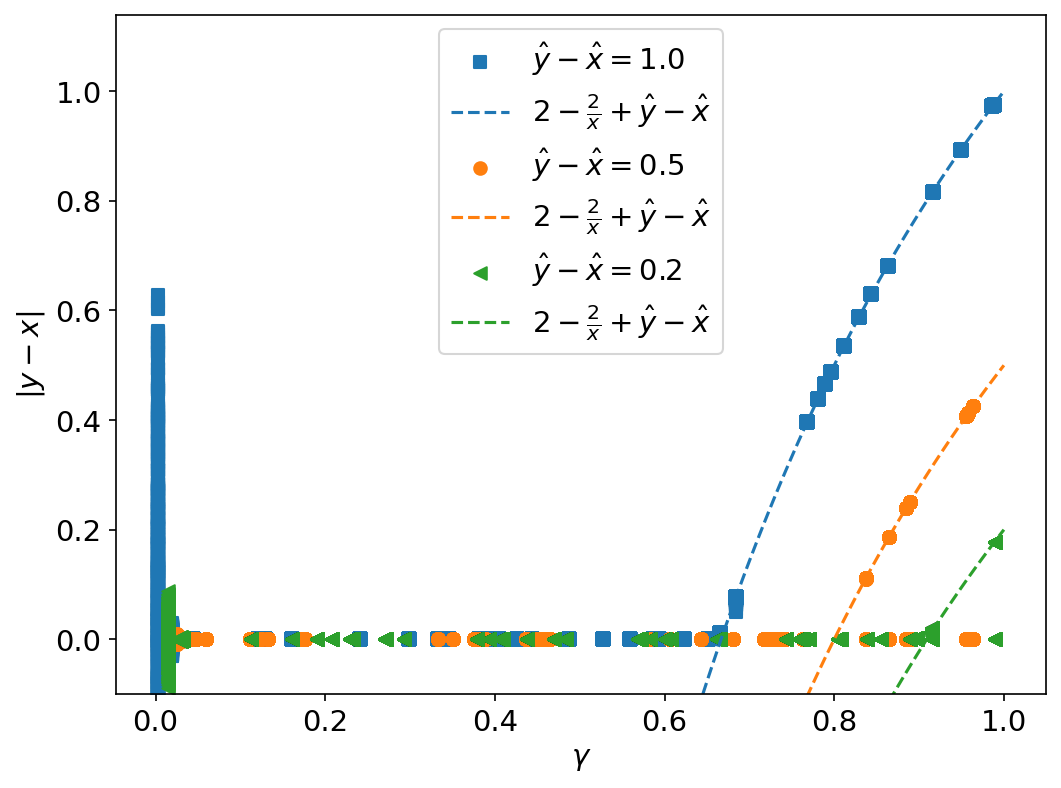

In [47]:
plt.figure(figsize=(8, 6))
#plt.scatter(results[:, 0], np.abs(results[:, 2] - results[:, 1]), label=r"$\Delta b = 0.5$", c="b")
#plt.scatter(results2[:, 0], np.abs(results2[:, 2] - results2[:, 1]), label=r"$\Delta b = 1.0$", marker="^")
x = np.linspace(0.5, 1, 100)
rr = [r01, r38, r46]
colors = ("tab:blue", "tab:orange", "tab:green")
markers = ("s", "o", "<")
for r, c, m in zip(rr, colors, markers):
#     if r.r0.size > 0:
#         plt.scatter(r.r0[:, 0], r.r0[:, 2] - r.r0[:, 1], 
#                     label=r"$\Delta b = 0.5$", c=c, marker="o")
    if r.r1.size > 0:
        plt.scatter(r.r1[:, 0], r.r1[:, 2] - r.r1[:, 1], 
                    label=r"$\hat{{y}} - \hat{{x}} = %.1f$" % (r.b2 - r.b1), c=c, marker=m)
    
    plt.plot(x, r.b2-r.b1 + 2 - 2./x, "--", c=c, label=r"$2-\frac{2}{x}+\hat{{y}}-\hat{{x}}$")

# plt.title("Bifurcation for 2 agent system with equal avantgarde factor")

plt.gcf().set_dpi(150)

plt.xlabel(r"$\gamma$")
plt.ylabel(r"$\| y - x \|$")
plt.ylim(-0.1)
plt.legend()
plt.show()

In [127]:
@dataclass
class Results:
    a2: float
    b1: float
    b2: float
    r0: np.ndarray
    r1: np.ndarray


def sim(b1, b2, a2):
    a1 = np.random.rand(40)
    results0, results1 = [], []

    for aj in a1:
        for i in range(1000):
            c1, c2 = np.random.rand(2) #* (b2 - b1) + b1
            while abs(c1 - c2) < 1e-2:
                c1, c2 = np.random.rand(2) #* (b2 - b1) + b1
            
            if (-a2-aj+1-(a2*b2-aj*b1)) > (a2*c2 - aj*c1) - 20 and c1 > c2:
                flag = 1
            else: 
                flag = 0
                
            flag = 0
            
            a0 = Agent(aj, b1, c1)
            a1 = Agent(a2, b2, c2)
            
            nsteps = 202
            for i in range(nsteps):
                step(a0, a1, 1.00, 0.0)
                if i > 200:
                    if flag:
                        results0.append([aj, a0.c, a1.c])
                    else:
                        results1.append([aj, a0.c, a1.c])
    return Results(a2, b1, b2, np.array(results0), np.array(results1))

r11 = sim(0.0, 1.0, 1.0)
r12 = sim(0.3, 0.8, 1.0)
r13 = sim(0.4, 0.7, 1.0)
r21 = sim(0.0, 1.0, 0.8)
r22 = sim(0.3, 0.8, 0.8)
r23 = sim(0.4, 0.7, 0.8)
r31 = sim(0.0, 1.0, 0.6)
r32 = sim(0.3, 0.8, 0.6)
r33 = sim(0.4, 0.7, 0.6)

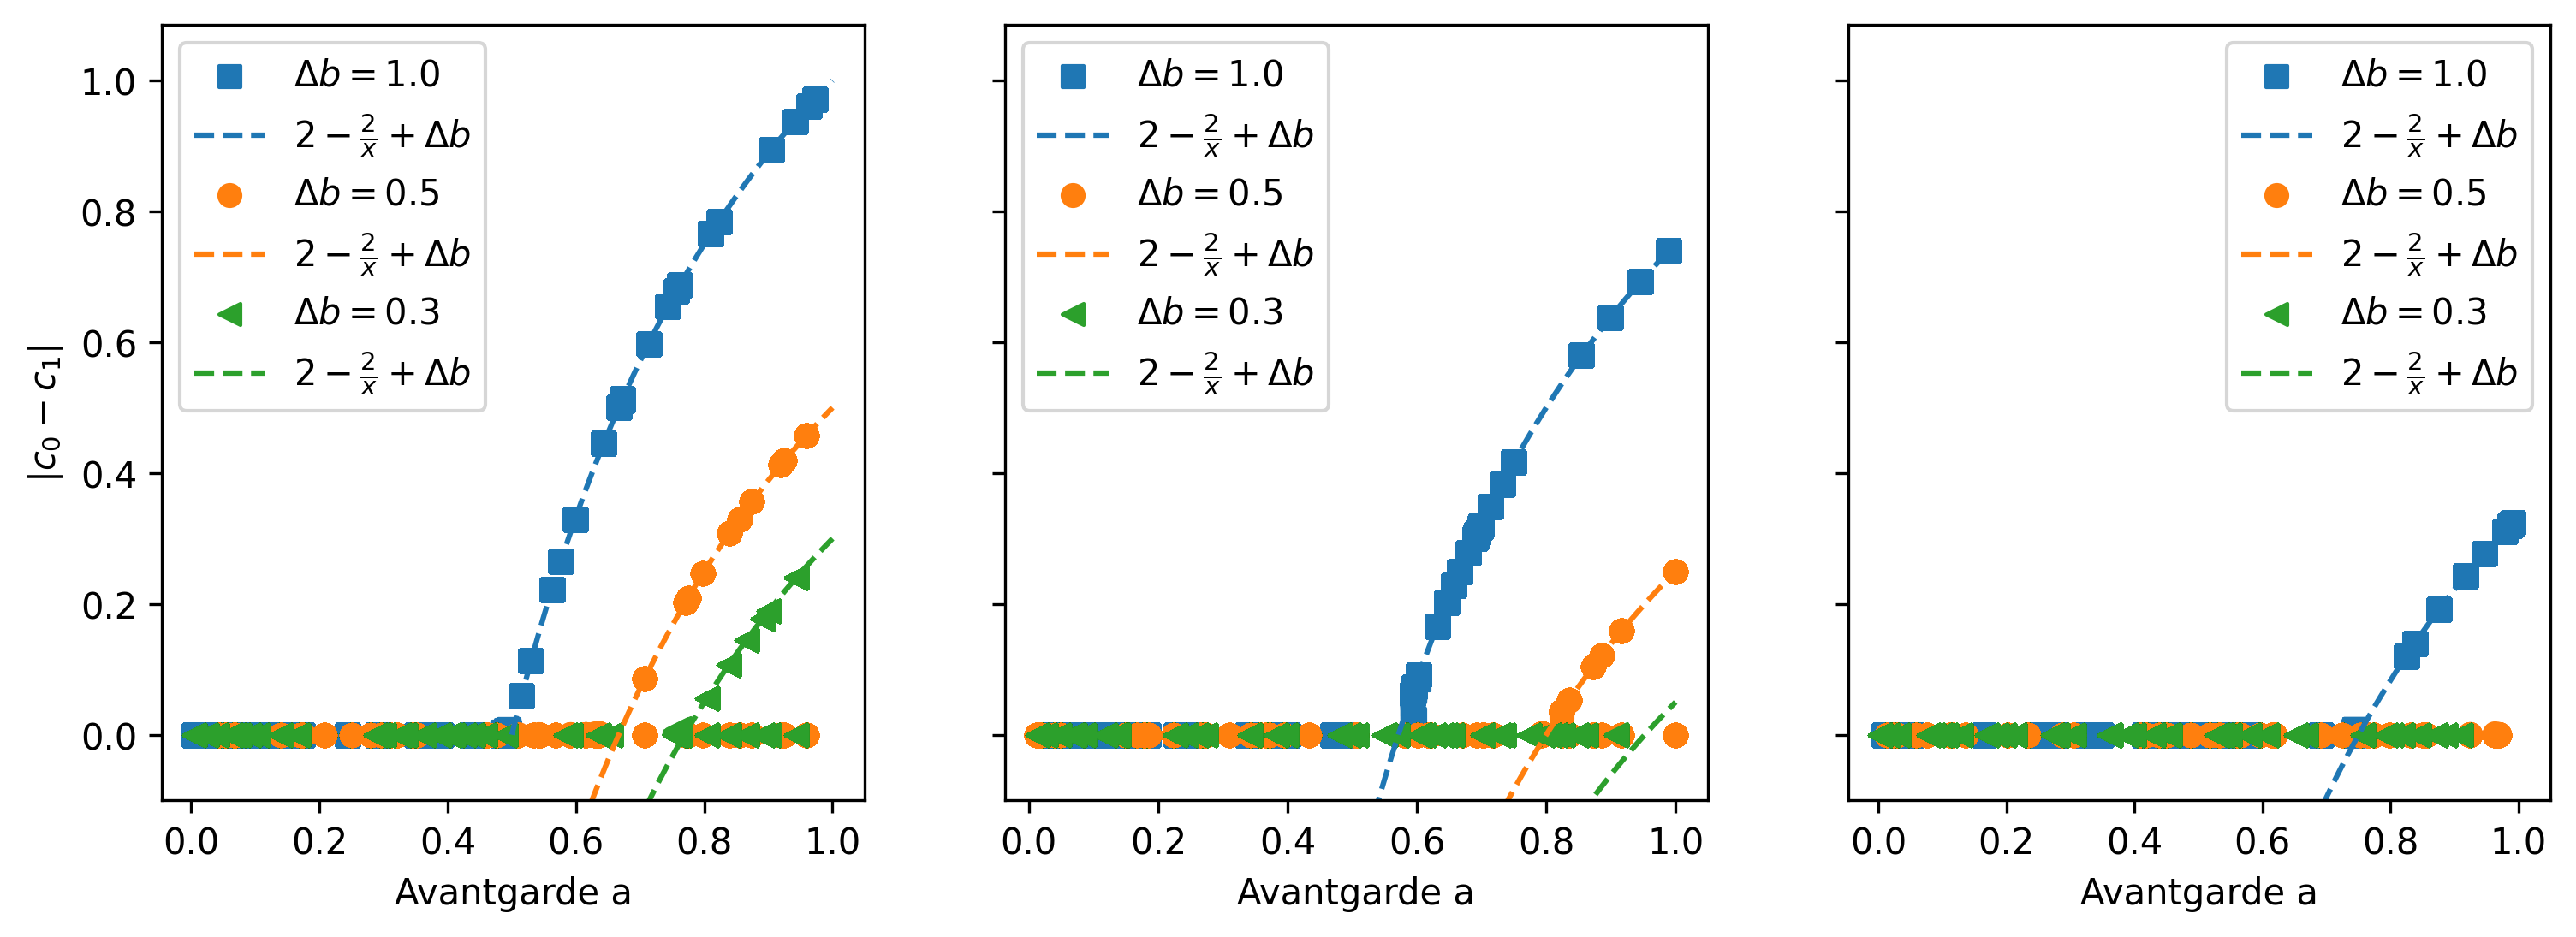

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
#plt.scatter(results[:, 0], np.abs(results[:, 2] - results[:, 1]), label=r"$\Delta b = 0.5$", c="b")
#plt.scatter(results2[:, 0], np.abs(results2[:, 2] - results2[:, 1]), label=r"$\Delta b = 1.0$", marker="^")
x = np.linspace(0.5, 1, 100)
data = [[r11, r12, r13], [r21, r22, r23], [r31, r32, r33]]
colors = ("tab:blue", "tab:orange", "tab:green")
markers = ("s", "o", "<")
for ax, rr in zip(axes, data):
    for r, c, m in zip(rr, colors, markers):
    #     if r.r0.size > 0:
    #         plt.scatter(r.r0[:, 0], r.r0[:, 2] - r.r0[:, 1], 
    #                     label=r"$\Delta b = 0.5$", c=c, marker="o")
        if r.r1.size > 0:
            ax.scatter(r.r1[:, 0], r.r1[:, 2] - r.r1[:, 1], 
                        label=r"$\Delta b = %.1f$" % (r.b2 - r.b1), c=c, marker=m)

        q = np.divide((r.a2 + x), (r.a2 * x))
        ax.plot(x, r.b2-r.b1 + 2 - q, "--", c=c, label=r"$2-\frac{2}{x}+\Delta b$")

# plt.title("Bifurcation for 2 agent system with equal avantgarde factor")
    ax.set_xlabel("Avantgarde a")
    ax.set_ylim(-0.1)
    ax.legend()

axes[0].set_ylabel(r"|$c_0 - c_1$|")
plt.show()

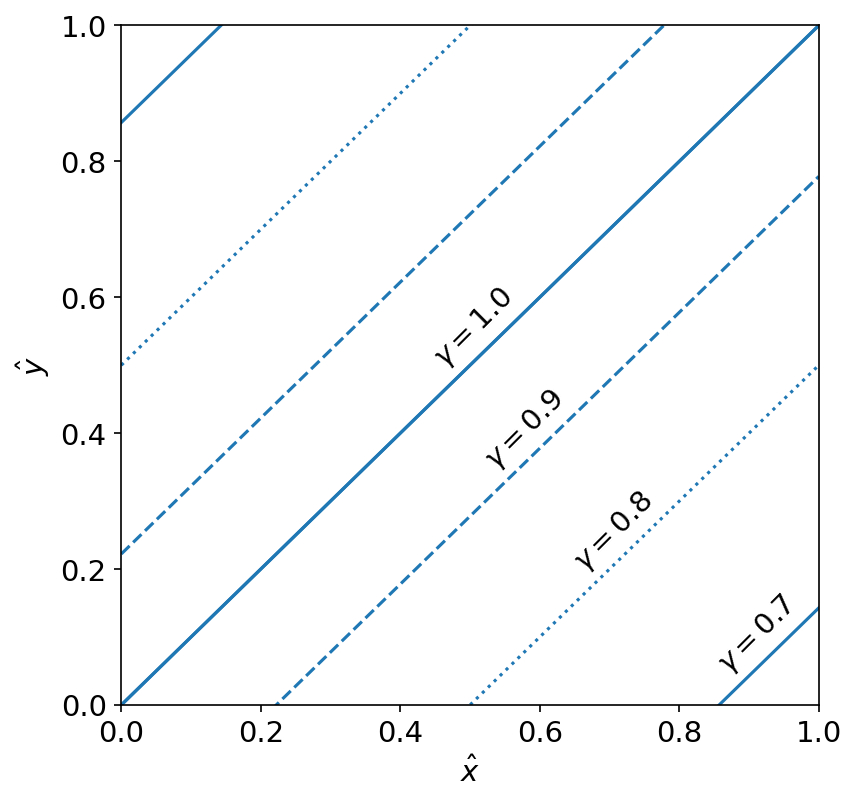

In [46]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})


fig = plt.figure(figsize=(6, 6))

x = np.linspace(0, 1, 600)

a=[1.0, 0.9, 0.8, 0.7]
s=["-", "--", ":", "-"]

for ai, si in zip(a, s):    
    
    plt.plot(x, x+2*(1-ai)/ai, c="#1f77b4", linestyle=si)
    plt.plot(x, x-2*(1-ai)/ai, c="#1f77b4", linestyle=si)
    
    # text
    xt = 0.5 * (3*ai - 2) + 0.00
    yt = xt + 2*(1-ai)/ai - 0.06
    
    plt.text(yt, xt, r"$\gamma = %.1f$" % ai, rotation=45)
        

plt.xlabel(r"$\hat{{x}}$")
plt.ylabel(r"$\hat{{y}}$")

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.gcf().set_dpi(150)
plt.show()

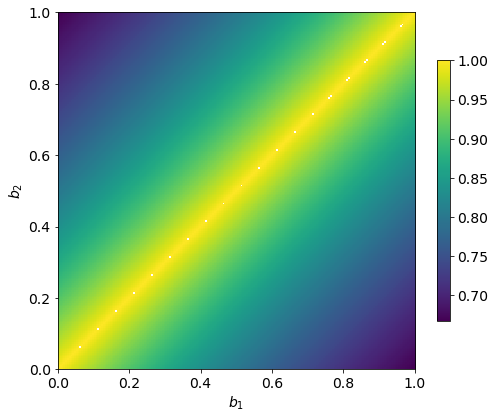

In [137]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import matplotlib

matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(8, 8))

# Make data.
X = np.linspace(0, 1, 200)
Y = np.linspace(1, 0, 200)
XX, YY = np.meshgrid(X, Y)
A = 2./(2+YY-XX)
A2 = 2./(2+XX-YY)
#B = 1. / (2 - XX)
#C = 1. / (1 + YY)

Amixed = A
Amixed[XX > YY] = A2[XX > YY]

Z = Amixed

Z[Z>1.0] = np.nan

surf = ax.imshow(Z, cmap="viridis", interpolation="None", vmax=1, extent=[0, 1, 0, 1], )
# Plot the surface.
#surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)


# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.6)


plt.xlabel(r"$b_1$")
plt.ylabel(r"$b_2$")

plt.show()

C:\Users\hoedtke\AppData\Local\Temp/ipykernel_19076/282036351.py:18: RuntimeWarning: divide by zero encountered in true_divide
  z = 2 + db > np.divide((aa1+aa2),aa1*aa2)
C:\Users\hoedtke\AppData\Local\Temp/ipykernel_19076/282036351.py:18: RuntimeWarning: invalid value encountered in true_divide
  z = 2 + db > np.divide((aa1+aa2),aa1*aa2)
C:\Users\hoedtke\AppData\Local\Temp/ipykernel_19076/282036351.py:20: UserWarning: The following kwargs were not used by contour: 'square'
  axis.contourf(aa1, aa2, z, cmap=cmap, square=True)


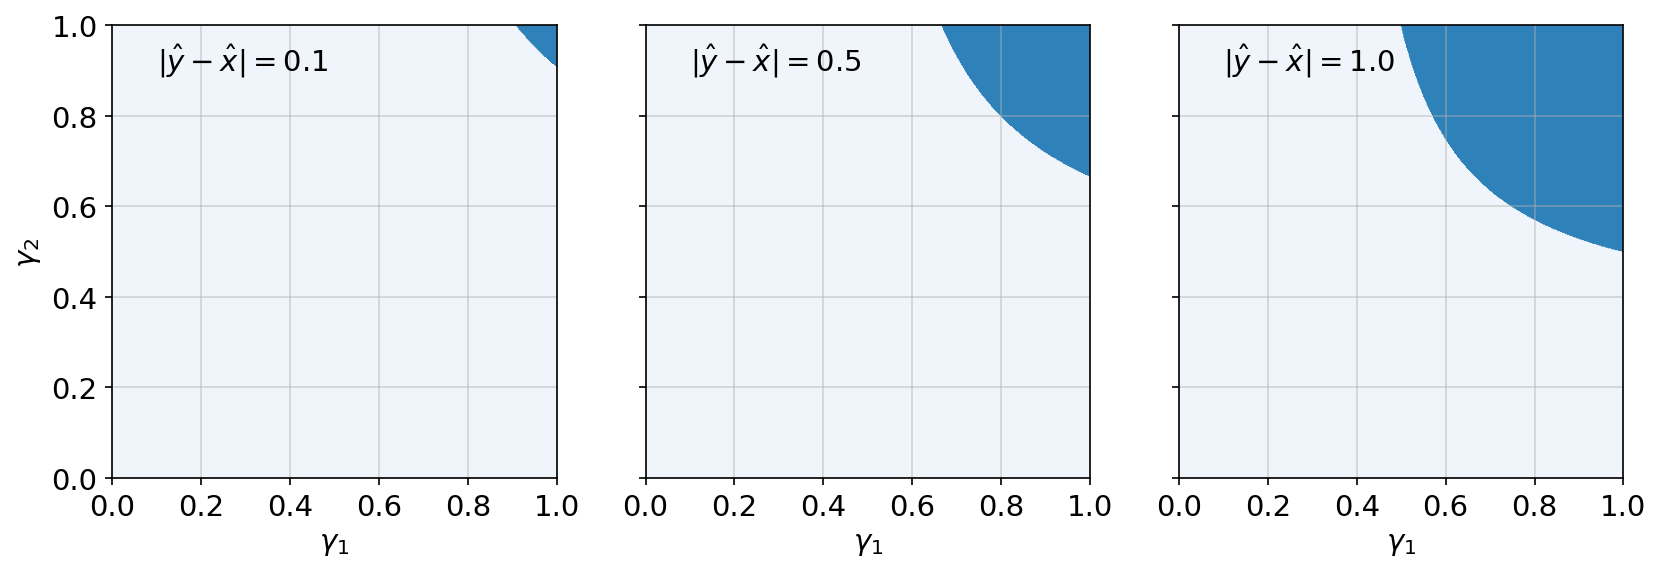

In [45]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 3, figsize=(13,4), sharey=True)

cmap = LinearSegmentedColormap.from_list("", ["white", "tab:blue"])
dbs = (0.1, 0.5, 1.0)
for db, axis in zip(dbs, ax):
    
    a1 = np.linspace(0., 1, 500)
    a2 = np.linspace(0, 1, 500)
    
    aa1, aa2 = np.meshgrid(a1, a2)
    
    z = 2 + db > np.divide((aa1+aa2),aa1*aa2)
    
    axis.contourf(aa1, aa2, z, cmap=cmap, square=True)
    axis.grid(True, alpha=0.5)
    axis.text(0.1, 0.9, fr"$\|\hat{{y}} - \hat{{x}}\| = {db}$")
    axis.set_xlabel(r"$\gamma_1$")

ax[0].set_ylabel(r"$\gamma_2$")

plt.gcf().set_dpi(150)
plt.show()

In [45]:
## two agents system

from dataclasses import dataclass
@dataclass
class Agent:
    a: np.float64
    b: np.float64
    c: np.float64

def step(agent0, agent1, tau=1, p=0):
    diffC = agent0.c - agent1.c
    deltaC0 = (1-agent0.a) * -diffC + agent0.a * (agent0.b - agent0.c) * abs(diffC)
    deltaC1 = (1-agent1.a) * diffC + agent1.a * (agent1.b - agent1.c) * abs(diffC)
    agent0.c += tau * deltaC0 + p
    agent1.c += tau * deltaC1 + p

    
agent0 = Agent(1.0, 0.8, 0.9)
agent1 = Agent(0.8, .3, 0.8)

step(agent0, agent1, 1.0)
print(agent0)
print(agent1)

nsteps = 100
for i in range(nsteps):
    step(agent0, agent1, 1.0)
    
print(agent0)
print(agent1)

agent1.c = agent0.c - 0.01
nsteps = 100
for i in range(nsteps):
    step(agent0, agent1, 1.0)
    
print(agent0)
print(agent1)

Agent(a=1.0, b=0.8, c=0.89)
Agent(a=0.8, b=0.3, c=0.78)
Agent(a=1.0, b=0.8, c=0.8000000000001319)
Agent(a=0.8, b=0.3, c=0.5500000001485734)
Agent(a=1.0, b=0.8, c=0.8000000000000003)
Agent(a=0.8, b=0.3, c=0.5500000025683144)
